In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import warnings

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
!pip3 install pycaret

In [ ]:
data = pd.read_csv("lending_club_datasets.zip")

In [ ]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
#import classification module from Pycaret
from pycaret import classification
classification_setup = classification.setup(data=data,target='credit.policy')



Setup Succesfully Completed!


,Description,Value
0,session_id,7802
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(9578, 14)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
#build xgboost model
classification_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9896,0.9992,0.9944,0.9926,0.9935,0.9667,0.9667
1,0.9970,0.9991,1.0000,0.9963,0.9982,0.9905,0.9905
2,0.9866,0.9888,0.9981,0.9854,0.9917,0.9564,0.9570
3,0.9836,0.9982,0.9981,0.9818,0.9899,0.9464,0.9473
4,0.9881,0.9952,1.0000,0.9854,0.9926,0.9609,0.9616
5,0.9925,0.9974,0.9981,0.9926,0.9954,0.9759,0.9760
6,0.9866,0.9994,0.9963,0.9872,0.9917,0.9564,0.9567
7,0.9896,0.9956,0.9963,0.9908,0.9935,0.9665,0.9666
8,0.9881,0.9981,1.0000,0.9854,0.9926,0.9611,0.9619
9,0.9821,0.9990,0.9963,0.9817,0.9890,0.9417,0.9424


In [ ]:
#build decision tree model
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9940,0.9963,0.9926,1.0000,0.9963,0.9812,0.9814
1,0.9925,0.9925,0.9926,0.9981,0.9954,0.9765,0.9766
2,0.9881,0.9752,0.9963,0.9890,0.9926,0.9616,0.9618
3,0.9911,0.9800,0.9981,0.9908,0.9945,0.9712,0.9714
4,0.9881,0.9780,0.9944,0.9908,0.9926,0.9616,0.9616
5,0.9851,0.9791,0.9889,0.9926,0.9907,0.9526,0.9526
6,0.9881,0.9809,0.9926,0.9926,0.9926,0.9618,0.9618
7,0.9896,0.9848,0.9926,0.9944,0.9935,0.9669,0.9669
8,0.9836,0.9725,0.9907,0.9889,0.9898,0.9477,0.9477
9,0.9925,0.9896,0.9944,0.9963,0.9954,0.9763,0.9764


In [ ]:
# compare performance of different classification models
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.9913,0.9943,0.9972,0.9921,0.9946,0.9722,0.9724,1.6896
1,CatBoost Classifier,0.9899,0.9982,0.9967,0.9908,0.9937,0.9673,0.9675,5.2635
2,Light Gradient Boosting Machine,0.9897,0.9984,0.9967,0.9906,0.9936,0.9669,0.9671,0.2569
3,Decision Tree Classifier,0.9893,0.9829,0.9933,0.9933,0.9933,0.9657,0.9658,0.0543
4,Extreme Gradient Boosting,0.9884,0.9970,0.9978,0.9879,0.9928,0.9623,0.9627,0.5806
5,Ada Boost Classifier,0.9857,0.9937,0.9941,0.9882,0.9911,0.9539,0.9541,0.4936
6,Random Forest Classifier,0.9837,0.9895,0.9918,0.9880,0.9899,0.9478,0.9480,0.1120
7,Extra Trees Classifier,0.9403,0.9826,0.9952,0.9350,0.9641,0.7882,0.8022,0.8218
8,Linear Discriminant Analysis,0.8989,0.9184,0.9831,0.9004,0.9400,0.6235,0.6487,0.0599
9,Ridge Classifier,0.8838,0.0000,0.9922,0.8791,0.9322,0.5359,0.5888,0.0161


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7802, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

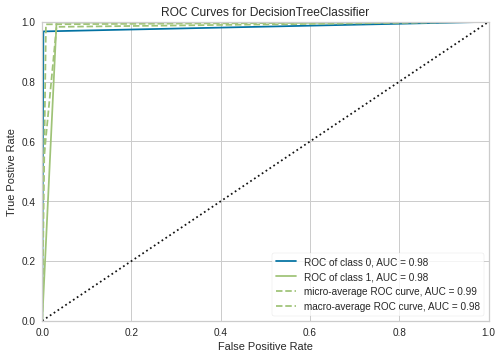

In [ ]:
# AUC-ROC plot
classification.plot_model(classification_dt, plot = 'auc')

# Decision Boundary
# classification.plot_model(classification_dt, plot = 'boundary')

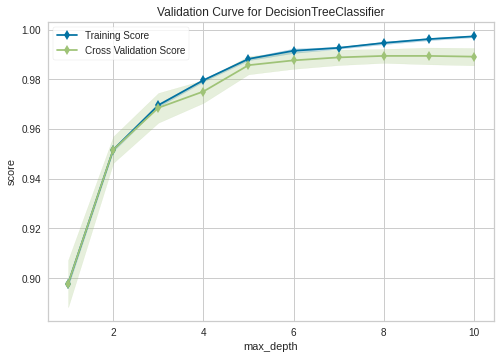

In [ ]:
# Precision Recall Curve
classification.plot_model(classification_dt, plot = 'pr')

# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394126 sha256=63a0a10e79b5bb90f62768b92e9a6f85bff78efa5f1e1d153d07e0a18ba02a7d
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


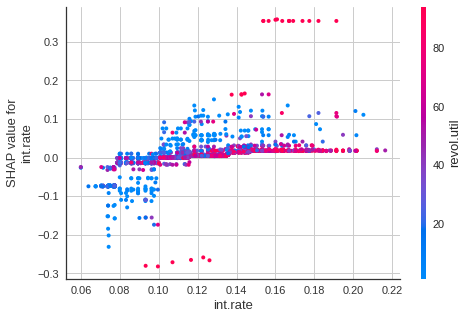

In [ ]:
!pip install shap


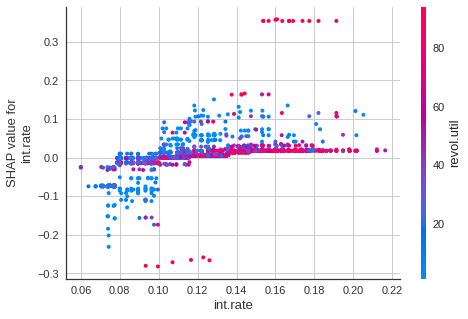

In [ ]:
# interpret model : Correlation
classification.interpret_model(classification_xgb,plot='correlation')

In [ ]:
# read the test data
test_data_classification = pd.read_csv("lending_club_datasets.zip")
# make predictions
predictions = classification.predict_model(classification_xgb, data=test_data_classification)
# view the predictions
predictions

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Label,Score
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0.9889
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0.9889
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0.9912
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0.9889
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0.9913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0.0723
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0.0164
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0.0172
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0.0088


In [ ]:
data[~data.apply(tuple,1).isin(predictions.apply(tuple,1))]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
